In [228]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
# Загрузим датасэт FairFace
df = pd.read_csv('/Users/dimasyrovitsky/Downloads/fairface_label_train.csv')

In [230]:
# Взглянем на датасэт FairFace
df

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True
...,...,...,...,...,...
86739,train/86740.jpg,20-29,Male,Indian,True
86740,train/86741.jpg,10-19,Male,Indian,True
86741,train/86742.jpg,more than 70,Female,Indian,True
86742,train/86743.jpg,10-19,Female,Black,True


In [231]:
# Проверяем пропущеные значения в колонках
df.isnull().sum()

file            0
age             0
gender          0
race            0
service_test    0
dtype: int64

In [232]:
# Поменяем некоторые значения в колоне 'age' для удобства фильтрации
df.loc[df['age'] == '3-9', 'age'] = '03-9'
df.loc[df['age'] == 'more than 70', 'age'] = '70+'

In [233]:
# Осортируем датасэт по значениям колоны 'age'
df_sort_age = df.sort_values('age')

<AxesSubplot:xlabel='age', ylabel='Count'>

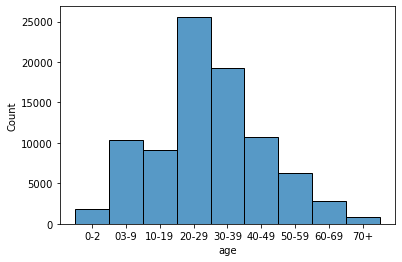

In [234]:
# Взлянем на распределение датасэта по возрасту
# На гистогамме видно что в датасэте доминируют выборки людей со средним возрастом
sns.histplot(data=df_sort_age, x = 'age')

In [235]:
# Выведим возрасные группы и количетво выборок в каждой
df_sort_age.groupby('age').aggregate({'gender': 'count'})

,gender
age,
0-2,1792
03-9,10408
10-19,9103
20-29,25598
30-39,19250
40-49,10744
50-59,6228
60-69,2779
70+,842


In [236]:
# Распределение по возрасту и полу
df_distribution_age_sex = df_sort_age.pivot_table(index='age',
                       columns='gender',
                       values='service_test',
                       aggfunc='count',
                       fill_value=0).reset_index()

In [237]:
# Выводим распределение по возрасту и полу
df_distribution_age_sex

gender,age,Female,Male
0,0-2,692,1100
1,03-9,4639,5769
2,10-19,4997,4106
3,20-29,14263,11335
4,30-39,8420,10830
5,40-49,4074,6670
6,50-59,2194,4034
7,60-69,1040,1739
8,70+,439,403


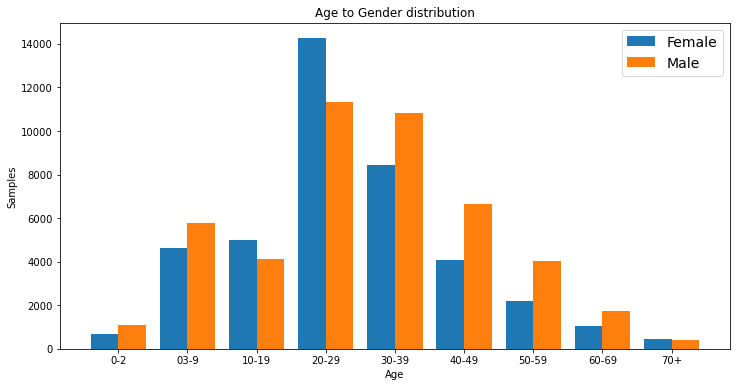

In [238]:
# Гистарамма распределения по возрасту и полу
# На гистарамме видно что распредеоение в каждой возрасной группе по полу примерно сблансировано
fig, ax = plt.subplots(figsize=(12,6))
X_axis = np.arange(len(df_distribution_age_sex['age']))
ax.bar(X_axis - 0.2, df_distribution_age_sex['Female'], 0.4, label = 'Female')
ax.bar(X_axis + 0.2, df_distribution_age_sex['Male'], 0.4, label = 'Male')
plt.xticks(X_axis, df_distribution_age_sex['age'])
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title("Age to Gender distribution")
ax.legend(fontsize = 14)
plt.show()

In [239]:
# Распределение по возрасту и расе
df_distribution_age_race = df_sort_age.pivot_table(index='age',
                       columns='race',
                       values='service_test',
                       aggfunc='count',
                       fill_value=0).reset_index()

In [240]:
# Выводим распределение по возрасту и расе
df_distribution_age_race

race,age,Black,East Asian,Indian,Latino_Hispanic,Middle Eastern,Southeast Asian,White
0,0-2,279,408,169,189,134,214,399
1,03-9,2072,1736,1530,1589,721,1523,1237
2,10-19,1518,1176,1529,1609,735,1388,1148
3,20-29,3171,4765,3077,3531,2323,3510,5221
4,30-39,2619,2382,2771,2932,2398,2009,4139
5,40-49,1459,939,1635,1957,1517,1058,2179
6,50-59,764,524,984,1124,837,616,1379
7,60-69,279,270,457,355,435,307,676
8,70+,72,87,167,81,116,170,149


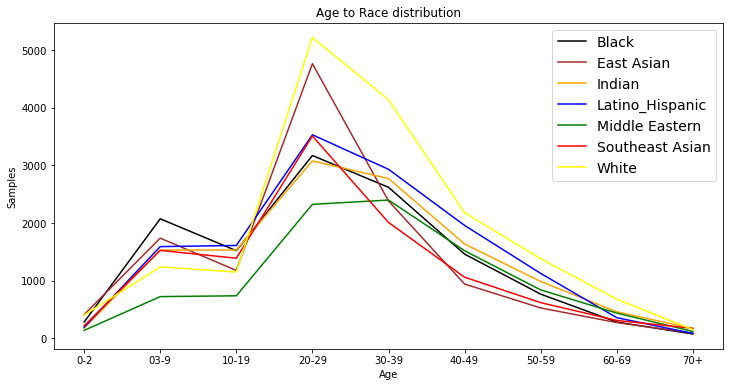

In [241]:
# График распределения по возрасту и расе
# На графике видно что распредеоение в каждой возрасной группе по расе примерно сблансировано,
# с небольшим перевесом белой и восточно азиатской рас в средней ворасной группе
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df_distribution_age_race['Black'], color='black', label='Black')
plt.plot(df_distribution_age_race['East Asian'], color='brown', label='East Asian')
plt.plot(df_distribution_age_race['Indian'], color='orange', label='Indian')
plt.plot(df_distribution_age_race['Latino_Hispanic'], color='blue', label='Latino_Hispanic')
plt.plot(df_distribution_age_race['Middle Eastern'], color='green', label='Middle Eastern')
plt.plot(df_distribution_age_race['Southeast Asian'], color='red', label='Southeast Asian')
plt.plot(df_distribution_age_race['White'], color='yellow', label='White')
plt.xticks(X_axis, df_distribution_age_race['age'])
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title("Age to Race distribution")
ax.legend(fontsize = 14)
plt.show()

In [243]:
# Распределение по возрасту и полу
df_distribution_race_gender = df_sort_age.pivot_table(index='race',
                       columns='gender',
                       values='service_test',
                       aggfunc='count',
                       fill_value=0).reset_index()

In [244]:
# Выводим распределение по возрасту и полу
df_distribution_race_gender

gender,race,Female,Male
0,Black,6137,6096
1,East Asian,6141,6146
2,Indian,5909,6410
3,Latino_Hispanic,6715,6652
4,Middle Eastern,2847,6369
5,Southeast Asian,5183,5612
6,White,7826,8701


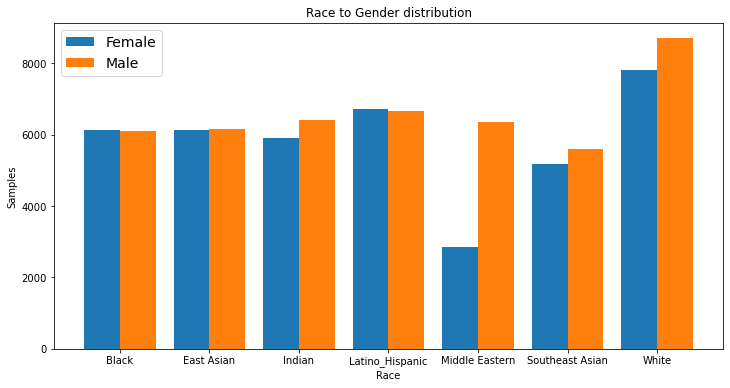

In [245]:
# Гисторамма распределения по возрасту и полу
# На гимсторамме видно что распредеоение в каждой расовой группе по полу примерно сблансировано,
# кроме ближневосточной, там значительно домерипует мужские выборки
fig, ax = plt.subplots(figsize=(12,6))
X_axis = np.arange(len(df_distribution_race_gender['race']))
ax.bar(X_axis - 0.2, df_distribution_race_gender['Female'], 0.4, label = 'Female')
ax.bar(X_axis + 0.2, df_distribution_race_gender['Male'], 0.4, label = 'Male')
plt.xticks(X_axis, df_distribution_race_gender['race'])
plt.xlabel("Race")
plt.ylabel("Samples")
plt.title("Race to Gender distribution")
ax.legend(fontsize = 14)
plt.show()

In [246]:
# Распределение по полу
df_gender_distribution = df['gender'].value_counts().reset_index()
df_gender_distribution.columns = ['gender', 'count']

In [247]:
# Выведим распределение по полу
df_gender_distribution

,gender,count
0,Male,45986
1,Female,40758


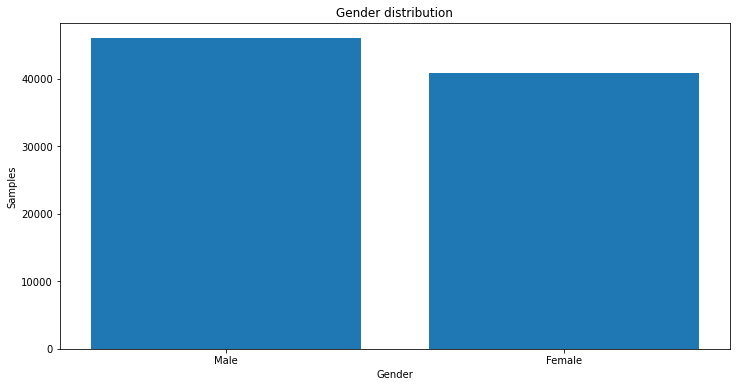

In [248]:
# Гисторамма распределения по полу
# На гимсторамме видно что распредеоение по полу сбалансировано, с небольшим перевесом мужских выборок
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(df_gender_distribution['gender'], df_gender_distribution['count'])

plt.xlabel("Gender")
plt.ylabel("Samples")
plt.title("Gender distribution")

plt.show()

In [249]:
# Распределение по расе
df_race_distribution = df['race'].value_counts().reset_index()
df_race_distribution.columns = ['race', 'count']

In [250]:
# Выведим распределение по расе
df_race_distribution

,race,count
0,White,16527
1,Latino_Hispanic,13367
2,Indian,12319
3,East Asian,12287
4,Black,12233
5,Southeast Asian,10795
6,Middle Eastern,9216


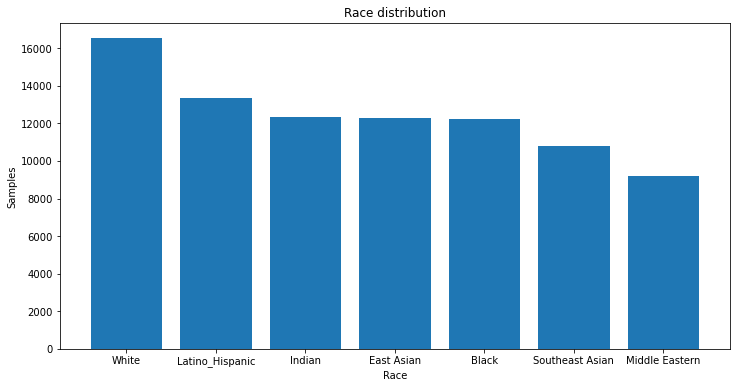

In [251]:
# Гисторамма распределения по расе
# На гимсторамме видно что распредеоение по расе сбалансировано, с небольшим перевесом в белой группе
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(df_race_distribution['race'], df_race_distribution['count'])

plt.xlabel("Race")
plt.ylabel("Samples")
plt.title("Race distribution")

plt.show()

In [252]:
# Вывод: набор данных хорошо сбалансирован по 7 расовым групам, что смячает расовую предвзятость. 
# После обучения на таком наборе данных модель будет показывать лучше точнось на новых данных.